In [56]:
import os 
import pandas as pd

ITERATIONS = 1
columns=["dataset", "mtl", 'gamma', "accuracy", "precision", "recall", "duration", "best_val_epoch", "best_val_acc"]
stl_results_fcn = pd.DataFrame(columns=columns)
stl_results_res = pd.DataFrame(columns=columns)

expl_type = "ig_norm"

for idx, dataset in enumerate(['GunPoint','Beef','ECG200']):#enumerate(os.listdir('./archives/ucr')):

    bac = 0; acc=0; precision=0; recall=0; duration=0

    for classifier in ['conv','ae']: 

        for gamma in [0.5,0.75]:

            stl_results_fcn_i = pd.DataFrame(columns=columns)
            stl_results_res_i = pd.DataFrame(columns=columns)

            for itr in range(ITERATIONS): 
                fcn_model = pd.read_csv(f'./results/ucr/{dataset}/experiment_2/fcn/fcn_mt_{classifier}_{gamma}_{itr}/fcn_{expl_type}/df_best_model.csv')
                fcn_metrics = pd.read_csv(f'./results/ucr/{dataset}/experiment_2/fcn/fcn_mt_{classifier}_{gamma}_{itr}/fcn_{expl_type}/task1_df_metrics.csv')
                fcn_hist = pd.read_csv(f'./results/ucr/{dataset}/experiment_2/fcn/fcn_mt_{classifier}_{gamma}_{itr}/fcn_{expl_type}/history.csv')
                res_model = pd.read_csv(f'./results/ucr/{dataset}/experiment_2/resnet/resnet_mt_{classifier}_{gamma}_{itr}/resnet_{expl_type}/df_best_model.csv')
                res_metrics = pd.read_csv(f'./results/ucr/{dataset}/experiment_2/resnet/resnet_mt_{classifier}_{gamma}_{itr}/resnet_{expl_type}/task1_df_metrics.csv')
                res_hist = pd.read_csv(f'./results/ucr/{dataset}/experiment_2/resnet/resnet_mt_{classifier}_{gamma}_{itr}/resnet_{expl_type}/history.csv')

                fcn_vals = [ fcn_metrics["accuracy"].values[0],fcn_metrics["precision"].values[0],
                            fcn_metrics["recall"].values[0], fcn_metrics["duration"].values[0],
                            list(fcn_hist["val_task_1_output_accuracy"]).index(max(fcn_hist["val_task_1_output_accuracy"])),
                            max(fcn_hist["val_task_1_output_accuracy"])]  
                res_vals = [res_metrics["accuracy"].values[0], res_metrics["precision"].values[0],
                            res_metrics["recall"].values[0], res_metrics["duration"].values[0],
                            list(res_hist["val_task_1_output_accuracy"]).index(max(res_hist["val_task_1_output_accuracy"])),
                            max(fcn_hist["val_task_1_output_accuracy"])]  
                #Read STL results for FCN classifier
                if itr == 0:
                    stl_results_fcn_i.loc[idx] = [dataset,classifier,gamma] + fcn_vals
                    stl_results_res_i.loc[idx] = [dataset,classifier,gamma] + res_vals
                else:
                    stl_results_fcn_i.loc[idx, columns[3:]] += fcn_vals
                    stl_results_res_i.loc[idx, columns[3:]] += res_vals

            stl_results_fcn_i.loc[idx, columns[3:]] /= ITERATIONS
            stl_results_res_i.loc[idx, columns[3:]] /= ITERATIONS

            stl_results_fcn = stl_results_fcn.append(stl_results_fcn_i)
            stl_results_res = stl_results_res.append(stl_results_res_i)




C:\Users\boent\AppData\Local\Temp\ipykernel_29464\1651300463.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stl_results_fcn = stl_results_fcn.append(stl_results_fcn_i)
C:\Users\boent\AppData\Local\Temp\ipykernel_29464\1651300463.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stl_results_res = stl_results_res.append(stl_results_res_i)
C:\Users\boent\AppData\Local\Temp\ipykernel_29464\1651300463.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stl_results_fcn = stl_results_fcn.append(stl_results_fcn_i)
C:\Users\boent\AppData\Local\Temp\ipykernel_29464\1651300463.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stl_resu

In [57]:
display(stl_results_fcn)

,dataset,mtl,gamma,accuracy,precision,recall,duration,best_val_epoch,best_val_acc
0,GunPoint,conv,0.50,1.000000,1.000000,1.000000,69.238138,104,1.000000
0,GunPoint,conv,0.75,0.993333,0.993333,0.993421,65.902966,108,1.000000
0,GunPoint,ae,0.50,1.000000,1.000000,1.000000,78.538585,78,1.000000
0,GunPoint,ae,0.75,1.000000,1.000000,1.000000,75.695552,89,1.000000
1,Beef,conv,0.50,0.533333,0.482540,0.533333,53.639248,311,0.733333
1,Beef,conv,0.75,0.433333,0.533333,0.433333,46.931747,280,0.666667
1,Beef,ae,0.50,0.600000,0.719048,0.600000,60.934572,394,0.700000
1,Beef,ae,0.75,0.633333,0.536111,0.633333,57.678759,309,0.733333
2,ECG200,conv,0.50,0.880000,0.873440,0.863715,55.751401,62,0.910000
2,ECG200,conv,0.75,0.880000,0.878676,0.857639,48.648509,76,0.900000


In [39]:
display(stl_results_fcn)
display(stl_results_res)


,dataset,mtl,gamma,accuracy,precision,recall,duration,best_val_epoch,best_val_acc
0,GunPoint,conv,0.75,0.993333,0.993333,0.993421,65.902966,108,1.000000
0,GunPoint,ae,0.75,1.000000,1.000000,1.000000,75.695552,89,1.000000
1,Beef,conv,0.75,0.433333,0.533333,0.433333,46.931747,280,0.666667
1,Beef,ae,0.75,0.633333,0.536111,0.633333,57.678759,309,0.733333
2,ECG200,conv,0.75,0.880000,0.878676,0.857639,48.648509,76,0.900000
2,ECG200,ae,0.75,0.880000,0.873440,0.863715,56.684412,174,0.910000


,dataset,mtl,gamma,accuracy,precision,recall,duration,best_val_epoch,best_val_acc


In [41]:
display(stl_results_fcn)
display(stl_results_res)

,dataset,mtl,gamma,accuracy,precision,recall,duration,best_val_epoch,best_val_acc
0,GunPoint,conv,0.75,0.993333,0.993333,0.993421,65.902966,108,1.000000
0,GunPoint,ae,0.75,1.000000,1.000000,1.000000,75.695552,89,1.000000
1,Beef,conv,0.75,0.433333,0.533333,0.433333,46.931747,280,0.666667
1,Beef,ae,0.75,0.633333,0.536111,0.633333,57.678759,309,0.733333
2,ECG200,conv,0.75,0.880000,0.878676,0.857639,48.648509,76,0.900000
2,ECG200,ae,0.75,0.880000,0.873440,0.863715,56.684412,174,0.910000


,dataset,mtl,gamma,accuracy,precision,recall,duration,best_val_epoch,best_val_acc
0,GunPoint,conv,0.75,0.986667,0.987179,0.986486,122.459184,263,1.000000
0,GunPoint,ae,0.75,0.986667,0.987179,0.986486,193.460865,171,1.000000
1,Beef,conv,0.75,0.766667,0.851948,0.766667,98.139515,221,0.666667
1,Beef,ae,0.75,0.733333,0.735000,0.733333,172.691682,196,0.733333
2,ECG200,conv,0.75,0.890000,0.893642,0.865451,94.159430,83,0.900000
2,ECG200,ae,0.75,0.900000,0.901654,0.879340,152.084931,143,0.910000


### Calculate Custom Metrics for Attribution Method


In [1]:
import tensorflow_addons as tfa
from utils.explanations import integrated_gradients
from keras.utils import CustomObjectScope
import tensorflow.keras as keras
import tensorflow as tf
import os
from utils.explanations import minmax_norm
from utils.explanations import calculate_ig_attributions, calculate_cam_attributions
from sklearn.metrics import mean_absolute_error, mean_squared_error
from utils.utils import read_dataset
from sklearn.preprocessing import normalize
import numpy as np
import pandas as pd

root_dir = 'G:/Meine Ablage/master thesis/code/xai-tsc'

# Load model to calculate custom metrics 
def load_model(root_dir, archive_name, dataset_name, classifier, data_source): 
    with CustomObjectScope({'InstanceNormalization':tfa.layers.InstanceNormalization()}):
        model_path = f'{root_dir}/results/{archive_name}/{dataset_name}/' \
                                                + f'{classifier.split("_")[0]}/{classifier}/{data_source}/' \
                                                + f'best_model.hdf5'
        model =keras.models.load_model(model_path ,compile=False)
        return model
    

def norm(values): 
    if not type(values) == np.ndarray:
        return normalize(values.numpy().reshape(1,-1))[0]
    else: 
        return normalize(values.reshape(1,-1))[0]
    

    
#store custom metrics for model
models_train  = dict()
models_test   = dict()
# Loop over data

archive = 'ucr'
dataset_name = 'Beef'
data_p = 'G:/Meine Ablage/master thesis/code/xai-tsc'

itr=0

gamma = 0.75


expl_type = 'cam'
form = 'norm'

for idx, dataset in enumerate(['ECG5000']):#'GunPoint','Beef', 'ECG200'

    print(dataset)
    ylen = 1
    #Just for now:

    data = read_dataset(data_p, archive, dataset, 'original', ylen)[dataset]
    #assertion,each ts has same length
    ylen = len(data[0][0])

    for gamma in [0.5, 0.75]:
        #fcn_mt_ae','fcn_mt_conv','resnet_mt_ae','resnet_mt_conv'
        for model in ['fcn_mt_ae','fcn_mt_conv','resnet_mt_ae','resnet_mt_conv']: #'fcn_mt_linear']: #['fcn_mt_ae','fcn_mt_conv', 'fcn_mt_linear']: 
            model_type = model.split('_')[0] 
            try: 

                if expl_type == 'ig': 
                    data_stl  = read_dataset(root_dir, archive, dataset, f'{model_type}_ig_{form}', ylen)[dataset]
                    #Load required models
                    #best epoch by val loss output_2:
                    hist = pd.read_csv(f'./results/ucr/{dataset}/experiment_2/{model_type}/{model}_{gamma}_{itr}/{model_type}_ig_{form}/history.csv')  
                    min_val_loss_output_2 = list(hist["task_2_output_loss"]).index(min(hist["task_2_output_loss"]))
                    best_val_acc = list(hist["val_task_1_output_accuracy"]).index(max(hist["val_task_1_output_accuracy"]))
                    link = f'./results/ucr/{dataset}/experiment_2/{model_type}/{model}_{gamma}_{itr}/{model_type}_ig_{form}/best_model.hdf5'
                    loaded_model = keras.models.load_model(link ,compile=False)
                    #Calculate attributions 
                    attributions = calculate_ig_attributions(root_dir, archive, f"{model}_{gamma}_{itr}", dataset, f"{model_type}_ig_{form}", task=1, experiment=2)
                elif expl_type == 'cam': 
                    data_stl  = read_dataset(root_dir, archive, dataset, f'{model_type}_cam_{form}', ylen)[dataset]
                    #Load required models
                    hist = pd.read_csv(f'./results/ucr/{dataset}/experiment_2/{model_type}/{model}_{gamma}_{itr}/{model_type}_cam_{form}/history.csv')  
                    min_val_loss_output_2 = list(hist["task_2_output_loss"]).index(min(hist["task_2_output_loss"]))
                    best_val_acc = list(hist["val_task_1_output_accuracy"]).index(max(hist["val_task_1_output_accuracy"]))
                    link = f'./results/ucr/{dataset}/experiment_2/{model_type}/{model}_{gamma}_{itr}/{model_type}_cam_{form}/best_model.hdf5'
                    loaded_model = keras.models.load_model(link ,compile=False)
                    attributions = calculate_cam_attributions(root_dir, archive, f"{model}_{gamma}_{itr}", dataset, f"{model_type}_cam_{form}", experiment=2)

                for t in [1,3]:
                    
                    tc = t 
                    #Pearson and mse [p,m]
                    pm1 = 0; pm2 = 0; pm3 = 0; pm4 = 0;  mm1 = 0; mm2 = 0; mm3 = 0; mm4 = 0
                    #predict values for all timeseries 
                    print("pred", t, data[t-1].shape)

                    pred = loaded_model.predict(data[t-1])
                    #run loop
                    for ts in range(len(data[t])):                
                        #small workaround
                        #structure of attributions 0 --> train 1 --> test set
                        pm1 += np.corrcoef(pred[1][ts].flatten(),data_stl[t][ts])[0,1]
                        pm2 += np.corrcoef(pred[1][ts].flatten(),attributions[0 if t == 1 else 1][ts][2])[0,1]
                        pm3 += np.corrcoef(data_stl[t][ts],attributions[0 if t == 1 else 1][ts][2])[0,1]
                        #pm4 += np.corrcoef(pred[1][ts].flatten(),ig_attributions_t2[0 if t == 1 else 1][ts][2])[0,1]
                        mm1 += mean_squared_error(pred[1][ts].flatten(),data_stl[t][ts])
                        mm2 += mean_squared_error(pred[1][ts].flatten(),attributions[0 if t == 1 else 1][ts][2])
                        mm3 += mean_squared_error(data_stl[t][ts],attributions[0 if t == 1 else 1][ts][2])
                        #mm4 += mean_squared_error(pred[1][ts].flatten(),ig_attributions_t2[0 if t == 1 else 1][ts][2])
                    #Init for model 
                    l = len(data[t])
                    if t == 1: 
                        #f'{dataset}_{model.split("_")[-1]}'
                        models_train[f'{dataset}_{model}_{gamma}'] = {"exp": expl_type,"model" : model, "gamma" : gamma, "pm1":pm1/l,"pm2": pm2/l,"pm3": pm3/l,"pm4": pm4/l,
                                                                            "mm1":mm1/l, "mm2": mm2/l, "mm3": mm3/l, "epoch_task_1": best_val_acc, 
                                                                            "epoch_task_2": min_val_loss_output_2 } # "mm4": mm4/l
                    else: 
                        models_test[f'{dataset}_{model}_{gamma}'] = {"exp": expl_type, "model" : model, "gamma" : gamma, "pm1":pm1/l,"pm2": pm2/l,"pm3": pm3/l,"pm4": pm4/l,
                                                                            "mm1":mm1/l, "mm2": mm2/l, "mm3": mm3/l, "epoch_task_1": best_val_acc, 
                                                                            "epoch_task_2": min_val_loss_output_2}#"mm4": mm4/l
                    
            except Exception as e: 
                print(dataset,"error", e)
                pass


c:\Users\boent\anaconda3\envs\xai-tsc\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


ECG5000
ECG5000 error [Errno 2] No such file or directory: './results/ucr/ECG5000/experiment_2/fcn/fcn_mt_ae_0.5_0/fcn_cam_norm/history.csv'
ECG5000 error [Errno 2] No such file or directory: './results/ucr/ECG5000/experiment_2/fcn/fcn_mt_conv_0.5_0/fcn_cam_norm/history.csv'
ECG5000 error G:/Meine Ablage/master thesis/code/xai-tsc/archives/ucr/ECG5000/resnet_cam_norm//ECG5000_TRAIN not found.
ECG5000 error G:/Meine Ablage/master thesis/code/xai-tsc/archives/ucr/ECG5000/resnet_cam_norm//ECG5000_TRAIN not found.
pred 1 (500, 140)
16/16 [==============================] - 1s 21ms/step
pred 3 (4500, 140)
141/141 [==============================] - 4s 26ms/step
pred 1 (500, 140)
16/16 [==============================] - 0s 10ms/step
pred 3 (4500, 140)
141/141 [==============================] - 1s 10ms/step
ECG5000 error G:/Meine Ablage/master thesis/code/xai-tsc/archives/ucr/ECG5000/resnet_cam_norm//ECG5000_TRAIN not found.
ECG5000 error G:/Meine Ablage/master thesis/code/xai-tsc/archives/ucr/

In [29]:
%matplotlib  inline
import matplotlib.pyplot as plt
ts = 2


read_dataset(root_dir, archive, dataset, f'{model_type}_cam_{form}', ylen)[dataset]
link = f'./results/ucr/{dataset}/experiment_2/{model_type}/{model}_{gamma}_{itr}/{model_type}_cam_{form}/best_model.hdf5'
loaded_model = keras.models.load_model(link ,compile=False)
attributions = calculate_cam_attributions(root_dir, archive, f"{model}_{gamma}_{itr}", dataset, f"{model_type}_cam_{form}", experiment=2)
pred = loaded_model.predict(data_stl[0])

#plt.plot(attributions[0][2])

FileNotFoundError: G:/Meine Ablage/master thesis/code/xai-tsc/archives/ucr/ECG5000/resnet_cam_norm//ECG5000_TRAIN not found.

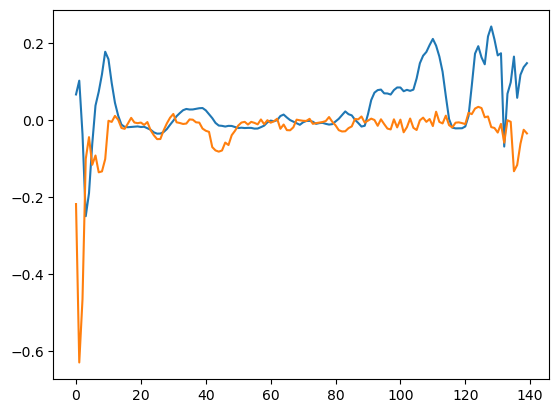

In [55]:
ts = 20
plt.plot(norm(attributions[0][ts][2]))
plt.plot(pred[1][ts])

In [53]:
np.argsort(norm(attributions[0][ts][2])),np.argsort(pred[1][0].flatten()) 

(array([  3,  78,  77,  76,  79,   4,  74,  75,  80,  26,  25,  18,  27,
         19,  21,  24,  17,  20,  23,  22,  28, 119,  16, 120,  14,  73,
        118,  69,  84,  15,  13,  53,  54,  56,  51,  55, 117,  57,  52,
         45,  85, 121,  70,  58,  50,  83,  46,  44,  47,  49,  48,  81,
         59,  64,  82,  63,  43,  65,  62,  60,  87,  68,  86,  66,  61,
         29,  67,  72,  71,  88, 135, 122,  42,  12,  30,  89, 136, 116,
         41,  90,  91,  31,  40,   2,   0,  32,  39,  11,   1,  38,  33,
          5,  92,  37, 105,  34,  36,  35, 134,  93, 104,  97, 115, 137,
         98,  96,   7, 106,  10, 103,  99,  95,  94, 123,   6, 100, 102,
        101, 127, 107, 133, 114, 108, 139,   8, 138, 109, 113, 131, 132,
        126, 110, 112,   9, 111, 128, 124, 125, 129, 130], dtype=int64),
 array([  1,   2,   0, 134, 135, 137, 133,   8,  41,  42,  44,  43,   7,
        136,  45,   3, 100,  46, 139,  40,  47,   6,  99, 108, 109,  49,
          4,  48, 101,  25,  53,  15,  50,  26,  51

In [3]:
pd.DataFrame(models_test).T

,exp,model,gamma,pm1,pm2,pm3,pm4,mm1,mm2,mm3,epoch_task_1,epoch_task_2
ECG5000_fcn_mt_ae_0.75,cam,fcn_mt_ae,0.75,0.931359,0.400431,0.436578,0.0,0.000785,362.64987,362.537215,206,489
ECG5000_fcn_mt_conv_0.75,cam,fcn_mt_conv,0.75,0.861983,0.262845,0.365447,0.0,0.001554,344.881417,344.640729,72,460


In [4]:
pd.DataFrame(models_test).T

,exp,model,gamma,pm1,pm2,pm3,pm4,mm1,mm2,mm3,epoch_task_1,epoch_task_2
ECG5000_fcn_mt_ae_0.75,ig,fcn_mt_ae,0.75,0.848634,0.72381,0.781908,0.0,0.001863,0.005565,0.005008,88,497
ECG5000_fcn_mt_conv_0.75,ig,fcn_mt_conv,0.75,0.804527,0.691016,0.767843,0.0,0.002414,0.009216,0.008072,135,495


In [159]:
import pandas as pd
#display(pd.DataFrame(models_train).T)
cam_train_att = pd.DataFrame(models_train).T
pd.DataFrame(models_train).T.to_csv("G:/Meine Ablage/master thesis/code/xai-tsc/results_csv/Experiment2/CAM_atts_train_e1.csv")
#display(pd.DataFrame(models_test).T)
pd.DataFrame(models_test).T.to_csv("G:/Meine Ablage/master thesis/code/xai-tsc/results_csv/Experiment2/CAM_atts_test_e1.csv")
cam_test_att = pd.DataFrame(models_test).T

display(cam_train_att)
display(cam_test_att)
cam_train_att['pm1'] = pd.to_numeric(cam_train_att['pm1'], errors='coerce')
cam_train_att['pm2'] = pd.to_numeric(cam_train_att['pm2'], errors='coerce')
cam_test_att['pm1'] = pd.to_numeric(cam_test_att['pm1'], errors='coerce')
cam_test_att['pm2'] = pd.to_numeric(cam_test_att['pm2'], errors='coerce')
#np.corrcoef(cam_train_att['pm1'].astype(np.float64),cam_train_att['pm2'].astype(np.float64))
np.corrcoef(cam_test_att['pm1'].astype(np.float64),cam_train_att['pm2'].astype(np.float64))

,exp,model,gamma,pm1,pm2,pm3,pm4,mm1,mm2,mm3,epoch_task_1,epoch_task_2
GunPoint_fcn_mt_ae_0.5,cam,fcn_mt_ae,0.5,0.838196,0.373019,0.475183,0.0,0.001211,74.641335,74.514739,98,361
GunPoint_fcn_mt_conv_0.5,cam,fcn_mt_conv,0.5,0.592408,0.285797,0.58289,0.0,0.003417,109.385109,109.179461,84,329
GunPoint_resnet_mt_ae_0.5,cam,resnet_mt_ae,0.5,0.945361,-0.243975,-0.24967,0.0,0.00079,129.325668,129.241506,79,388
GunPoint_fcn_mt_ae_0.75,cam,fcn_mt_ae,0.75,0.875559,0.460969,0.592839,0.0,0.001031,140.313669,140.074409,204,397
GunPoint_fcn_mt_conv_0.75,cam,fcn_mt_conv,0.75,0.646078,0.325371,0.660711,0.0,0.002545,117.878015,117.539064,117,398
GunPoint_resnet_mt_ae_0.75,cam,resnet_mt_ae,0.75,0.981056,-0.217294,-0.230952,0.0,0.000247,111.615319,111.600566,112,393
GunPoint_resnet_mt_conv_0.75,cam,resnet_mt_conv,0.75,0.930127,-0.191477,-0.220169,0.0,0.000894,123.609349,123.637415,104,394
Beef_fcn_mt_ae_0.5,cam,fcn_mt_ae,0.5,0.717355,0.102491,0.190447,0.0,0.001007,95.321996,95.25273,293,366
Beef_fcn_mt_conv_0.5,cam,fcn_mt_conv,0.5,0.278751,-0.017926,0.337344,0.0,0.003972,90.525149,90.43221,368,394
Beef_resnet_mt_ae_0.5,cam,resnet_mt_ae,0.5,0.82726,0.305082,0.384853,0.0,0.000769,210.316935,210.36981,210,396


,exp,model,gamma,pm1,pm2,pm3,pm4,mm1,mm2,mm3,epoch_task_1,epoch_task_2
GunPoint_fcn_mt_ae_0.5,cam,fcn_mt_ae,0.5,0.732318,0.312005,0.464669,0.0,0.002104,71.35073,71.18919,98,361
GunPoint_fcn_mt_conv_0.5,cam,fcn_mt_conv,0.5,0.55565,0.273293,0.571885,0.0,0.003892,108.644807,108.406957,84,329
GunPoint_resnet_mt_ae_0.5,cam,resnet_mt_ae,0.5,0.893787,-0.179832,-0.1678,0.0,0.001402,131.45473,131.329213,79,388
GunPoint_fcn_mt_ae_0.75,cam,fcn_mt_ae,0.75,0.778692,0.409025,0.601824,0.0,0.001975,132.080261,131.763496,204,397
GunPoint_fcn_mt_conv_0.75,cam,fcn_mt_conv,0.75,0.598994,0.304523,0.667823,0.0,0.003178,114.88068,114.508223,117,398
GunPoint_resnet_mt_ae_0.75,cam,resnet_mt_ae,0.75,0.921167,-0.181797,-0.174773,0.0,0.001012,109.513033,109.446294,112,393
GunPoint_resnet_mt_conv_0.75,cam,resnet_mt_conv,0.75,0.872875,-0.095919,-0.112495,0.0,0.001649,118.288217,118.273777,104,394
Beef_fcn_mt_ae_0.5,cam,fcn_mt_ae,0.5,0.57359,0.133316,0.202338,0.0,0.001329,86.803197,86.76472,293,366
Beef_fcn_mt_conv_0.5,cam,fcn_mt_conv,0.5,0.25708,-0.003524,0.292446,0.0,0.004332,89.701963,89.649478,368,394
Beef_resnet_mt_ae_0.5,cam,resnet_mt_ae,0.5,0.530236,0.186299,0.225233,0.0,0.001735,167.062868,167.163605,210,396


array([[1.        , 0.13760184],
       [0.13760184, 1.        ]])

### Integrated Gradients


In [42]:
import pandas as pd

#display(pd.DataFrame(models_train).T)
#ig_train_att = pd.DataFrame(models_train).T
ig_train_att = pd.read_csv("G:/Meine Ablage/master thesis/code/xai-tsc/results_csv/Experiment2/IG_atts_train_e1.csv")

display(pd.DataFrame(ig_train_att))
#pd.DataFrame(models_train).T.to_csv("G:/Meine Ablage/master thesis/code/xai-tsc/results_csv/Experiment2/IG_atts_train_e1.csv")
#pd.DataFrame(models_train).T.to_latex("G:/Meine Ablage/master thesis/code/xai-tsc/results_csv/Experiment2/IG_atts_train_e1.tex")
#display(pd.DataFrame(models_test).T)
#pd.DataFrame(models_test).T.to_csv("G:/Meine Ablage/master thesis/code/xai-tsc/results_csv/Experiment2/IG_atts_test_e1.csv")
#ig_test_att  = pd.DataFrame(models_test).T
ig_test_att = pd.read_csv("G:/Meine Ablage/master thesis/code/xai-tsc/results_csv/Experiment2/IG_atts_test_e1.csv")
display(pd.DataFrame(ig_test_att))

#new_index = [label.split('_')[0] for label in ig_test_att.index]
#ig_test_att.index = new_index
#ig_test_att.to_latex("G:/Meine Ablage/master thesis/code/xai-tsc/results_csv/Experiment2/IG_atts_test_e1.tex")

,Unnamed: 0,exp,model,gamma,pm1,pm2,pm3,pm4,mm1,mm2,mm3,epoch_task_1,epoch_task_2
0,GunPoint_fcn_mt_ae_0.5,ig,fcn_mt_ae,0.50,0.971195,0.802238,0.821623,0.0,0.000422,0.003967,0.004656,78,399
1,GunPoint_fcn_mt_conv_0.5,ig,fcn_mt_conv,0.50,0.764027,0.575419,0.747143,0.0,0.003145,0.003757,0.005066,104,292
2,GunPoint_resnet_mt_ae_0.5,ig,resnet_mt_ae,0.50,0.991530,0.584112,0.590132,0.0,0.000122,0.005136,0.005086,173,380
3,GunPoint_resnet_mt_conv_0.5,ig,resnet_mt_conv,0.50,0.957618,0.443103,0.470186,0.0,0.000639,0.005057,0.005606,54,386
4,GunPoint_fcn_mt_ae_0.75,ig,fcn_mt_ae,0.75,0.966496,0.821858,0.843989,0.0,0.000486,0.004248,0.004904,89,399
5,GunPoint_fcn_mt_conv_0.75,ig,fcn_mt_conv,0.75,0.692999,0.533897,0.782874,0.0,0.003538,0.002989,0.005227,108,390
6,GunPoint_resnet_mt_ae_0.75,ig,resnet_mt_ae,0.75,0.983828,0.654808,0.657556,0.0,0.000228,0.004512,0.004517,171,397
7,GunPoint_resnet_mt_conv_0.75,ig,resnet_mt_conv,0.75,0.957868,0.725599,0.751423,0.0,0.000664,0.005660,0.005550,263,389
8,Beef_fcn_mt_ae_0.5,ig,fcn_mt_ae,0.50,0.584964,0.246062,0.436743,0.0,0.001391,0.000855,0.001909,394,399
9,Beef_fcn_mt_conv_0.5,ig,fcn_mt_conv,0.50,0.025922,-0.012391,0.326703,0.0,0.003574,0.001612,0.001942,311,339


,Unnamed: 0,exp,model,gamma,pm1,pm2,pm3,pm4,mm1,mm2,mm3,epoch_task_1,epoch_task_2
0,GunPoint_fcn_mt_ae_0.5,ig,fcn_mt_ae,0.50,0.834004,0.713088,0.791740,0.0,0.001862,0.003697,0.004923,78,399
1,GunPoint_fcn_mt_conv_0.5,ig,fcn_mt_conv,0.50,0.642387,0.505301,0.714599,0.0,0.004204,0.003536,0.005271,104,292
2,GunPoint_resnet_mt_ae_0.5,ig,resnet_mt_ae,0.50,0.892308,0.530635,0.572564,0.0,0.001331,0.004690,0.005191,173,380
3,GunPoint_resnet_mt_conv_0.5,ig,resnet_mt_conv,0.50,0.853467,0.438191,0.506414,0.0,0.001871,0.004900,0.005648,54,386
4,GunPoint_fcn_mt_ae_0.75,ig,fcn_mt_ae,0.75,0.833614,0.717588,0.818964,0.0,0.001936,0.004300,0.005164,89,399
5,GunPoint_fcn_mt_conv_0.75,ig,fcn_mt_conv,0.75,0.588681,0.471202,0.757876,0.0,0.004403,0.002860,0.005393,108,390
6,GunPoint_resnet_mt_ae_0.75,ig,resnet_mt_ae,0.75,0.883517,0.563153,0.620911,0.0,0.001421,0.004267,0.004548,171,397
7,GunPoint_resnet_mt_conv_0.75,ig,resnet_mt_conv,0.75,0.846144,0.663602,0.747374,0.0,0.001986,0.006108,0.006131,263,389
8,Beef_fcn_mt_ae_0.5,ig,fcn_mt_ae,0.50,0.477017,0.096976,0.148234,0.0,0.001657,0.000875,0.002224,394,399
9,Beef_fcn_mt_conv_0.5,ig,fcn_mt_conv,0.50,0.003429,-0.021624,0.163460,0.0,0.003671,0.001621,0.002065,311,339


In [130]:
## Queries 
#1. Where is prediction worse then the actual attribution 
print("total classifiers", ig_test_att.index.size)
display(ig_train_att.query('pm1 < pm2'))
display(ig_test_att.query('pm1 < pm2'))

ig_train_att['pm1'] = pd.to_numeric(ig_train_att['pm1'], errors='coerce')
n_smallest_values_train_pm1 = ig_train_att.nsmallest(6, 'pm1')
ig_train_att['pm2'] = pd.to_numeric(ig_train_att['pm2'], errors='coerce')
n_smallest_values_train_pm2 = ig_train_att.nsmallest(6, 'pm2')



ig_test_att['pm1'] = pd.to_numeric(ig_test_att['pm1'], errors='coerce')
n_smallest_values_test_pm1 = ig_test_att.nsmallest(6, 'pm1')
ig_test_att['pm2'] = pd.to_numeric(ig_test_att['pm2'], errors='coerce')
n_smallest_values_test_pm2 = ig_test_att.nsmallest(6, 'pm2')


print(
    "Train: Pm1 and Pm2 both under smallest 6:", len(np.intersect1d(n_smallest_values_train_pm1.index,n_smallest_values_train_pm2.index)),
     "Test: Pm1 and Pm2 both under smallest 6:",len(np.intersect1d(n_smallest_values_test_pm1.index,n_smallest_values_test_pm2.index))
)


print("PM1: Where train is small also test has small pm values 4:",len(np.intersect1d(n_smallest_values_train_pm1.index,n_smallest_values_test_pm1.index)))
print("PM2: Where train is small also test has small pm values 4:",len(np.intersect1d(n_smallest_values_train_pm2.index,n_smallest_values_test_pm2.index)))


n_largest_values_train_pm1 = ig_train_att.nlargest(6, 'pm1')
n_largest_values_train_pm2 = ig_train_att.nlargest(6, 'pm2')

n_largest_values_test_pm1 = ig_test_att.nlargest(6, 'pm1')
n_largest_values_test_pm2 = ig_test_att.nlargest(6, 'pm2')



print(
    "Train: Pm1 and Pm2 both under highest 6:", len(np.intersect1d(n_largest_values_train_pm1.index,n_largest_values_test_pm1.index)),
     "Test: Pm1 and Pm2 both under highest 6:",len(np.intersect1d(n_largest_values_train_pm2.index,n_largest_values_test_pm2.index))
)


print("PM1: Where train is high also test has highest pm values 6:",len(np.intersect1d(n_largest_values_train_pm1.index,n_largest_values_test_pm1.index)))
print("PM2: Where train is high also test has highest pm values 6:",len(np.intersect1d(n_largest_values_train_pm2.index,n_largest_values_test_pm2.index)))


total classifiers 24


,exp,model,gamma,pm1,pm2,pm3,pm4,mm1,mm2,mm3,epoch_task_1,epoch_task_2
Beef_fcn_mt_conv_0.75,ig,fcn_mt_conv,0.75,0.095702,0.144831,0.431575,0.0,0.002892,0.001254,0.001787,280,377


,exp,model,gamma,pm1,pm2,pm3,pm4,mm1,mm2,mm3,epoch_task_1,epoch_task_2
Beef_fcn_mt_conv_0.75,ig,fcn_mt_conv,0.75,0.140925,0.163118,0.373448,0.0,0.002772,0.001188,0.001983,280,377


Train: Pm1 and Pm2 both under smallest 6: 5 Test: Pm1 and Pm2 both under smallest 6: 5
PM1: Where train is small also test has small pm values 4: 4
PM2: Where train is small also test has small pm values 4: 5
Train: Pm1 and Pm2 both under highest 6: 2 Test: Pm1 and Pm2 both under highest 6: 4
PM1: Where train is high also test has highest pm values 6: 2
PM2: Where train is high also test has highest pm values 6: 4


In [135]:
np.corrcoef(ig_train_att["pm1"].values, ig_train_att["pm2"]), np.corrcoef(ig_test_att["pm1"].values, ig_test_att["pm2"])

(array([[1.        , 0.89090217],
        [0.89090217, 1.        ]]),
 array([[1.        , 0.87775997],
        [0.87775997, 1.        ]]))

In [45]:
np.corrcoef(ig_train_att["pm1"].values, ig_train_att["pm3"]), np.corrcoef(ig_test_att["pm1"].values, ig_test_att["pm3"])
np.corrcoef(ig_train_att["pm2"].values, ig_train_att["pm3"]), np.corrcoef(ig_test_att["pm2"].values, ig_test_att["pm3"])

(array([[1.        , 0.89229548],
        [0.89229548, 1.        ]]),
 array([[1.        , 0.90687824],
        [0.90687824, 1.        ]]))

In [44]:
np.corrcoef(ig_train_att["pm1"].values, ig_test_att["pm1"]), np.corrcoef(ig_train_att["pm2"].values, ig_test_att["pm2"])

(array([[1.        , 0.90567897],
        [0.90567897, 1.        ]]),
 array([[1.        , 0.94322018],
        [0.94322018, 1.        ]]))

### Visualization